In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import defaultdict 
from scipy.stats import norm

%matplotlib inline

In [2]:
responses = [False, None, False, True, None, True, False, False, False, False,
       False, False, False, False, True, False, True, False, False, False,
       True, False, False, False, True, False, True, True, True, False,
       True, False, False, False, False, False, False]
levels = [-3,  3, -3,  3, -3, -3,  3,  3,  0, -2, -3, -1,  0, -3,  2,  0,  2,
        0, -1,  1,  3,  0, -3, -2,  1,  1,  0,  3, -2,  2,  2,  1,  3, -3,
       -3, -2,  2]

In [3]:
n = len(responses)

responses_by_level = defaultdict(list)

for i in range(n):
    if responses[i] == None:
        continue
    responses_by_level[levels[i]].append(int(responses[i]))

responses_by_level

defaultdict(list,
            {-3: [0, 0, 1, 0, 0, 0, 0, 0],
             -2: [0, 0, 1, 0],
             -1: [0, 0],
             0: [0, 0, 0, 0, 0, 1],
             1: [0, 1, 0, 0],
             2: [1, 1, 0, 1, 0],
             3: [1, 0, 0, 1, 1, 0]})

In [4]:
percentages = defaultdict(list)

for level in responses_by_level:
    resps = responses_by_level[level]
    percentages[level] = np.sum(resps) / len(resps)
    
percentages

defaultdict(list,
            {-3: 0.125,
             -2: 0.25,
             -1: 0.0,
             0: 0.16666666666666666,
             1: 0.25,
             2: 0.6,
             3: 0.5})

In [5]:
# make sure everything is sorted
all_values = list(zip(percentages.keys(), percentages.values()))
all_values = np.array(sorted(all_values, key=lambda x: x[0]))
all_values

array([[-3.        ,  0.125     ],
       [-2.        ,  0.25      ],
       [-1.        ,  0.        ],
       [ 0.        ,  0.16666667],
       [ 1.        ,  0.25      ],
       [ 2.        ,  0.6       ],
       [ 3.        ,  0.5       ]])

In [6]:
x = all_values[:,0]
# p = all_values[:,1]
p = [0, 0.1, 0.3, 0.55, 0.7, 0.9, 1]  # test: something that actually looks like a psychometric function

In [7]:
(mu, sigma), cov = curve_fit(norm.cdf, x, p, [0,1]) # last argument is initialization
mu, sigma

(-0.07087196912887732, 1.618199727443903)

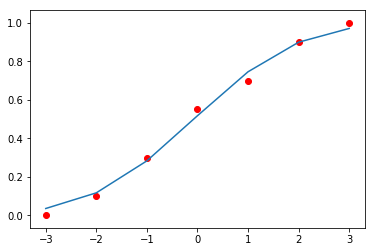

In [10]:
plt.scatter(x, p, c='r')
plt.plot(x, norm.cdf(x, mu, sigma))